# **LIBRARIES**

In [ ]:
import random
import imutils
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator

# **FUNCTIONS**

In [ ]:
def evaluate_thresholds(image, range_thresholds, range_blur_kernel_dimension):
    """
    Display multiple thresholded versions of an image in a grid.

    Args:
    image (numpy.ndarray): Input image as a NumPy array.
    range_thresholds (list): List of threshold values to apply.
    range_blur_kernel_dimension (list): List of blur kernel dimensions to apply.

    Returns:
    None
    """

    # Calculate the number of rows and columns for the subplot grid.
    num_rows = len(range_blur_kernel_dimension)
    num_cols = len(range_thresholds)

    # Create a new figure with a specified size.
    plt.figure(figsize=(10, 10))

    # Loop through each combination of kernel size and threshold value.
    for i, ksize in enumerate(range_blur_kernel_dimension):
        for j, threshold in enumerate(range_thresholds):
            # Select the subplot position based on current iteration.
            plt.subplot(num_rows, num_cols, i * num_cols + j + 1)

            # If it's the first column, add a label on the left side.
            if j == 0:
                if ksize == 0:
                    # Apply thresholding without blurring.
                    new_image = (image > threshold).astype(np.uint8) * 255
                    plt.imshow(new_image, cmap="gray")
                    plt.title(f'Threshold {threshold}')
                else:
                    # Apply thresholding after blurring with specified kernel size.
                    blurred_image = cv2.blur(image, (ksize, ksize))
                    thresholded_image = (blurred_image > threshold).astype(np.uint8) * 255
                    plt.imshow(thresholded_image, cmap="gray")
                    plt.title(f' Threshold {threshold}')
                # Add a y-label indicating the kernel size.
                plt.ylabel(f'Kernel size {ksize}', fontsize=10)
            else:
                # No label on the left side for other columns.
                if ksize == 0:
                    # Apply thresholding without blurring.
                    new_image = (image > threshold).astype(np.uint8) * 255
                    plt.imshow(new_image, cmap="gray")
                    plt.title(f'Threshold {threshold}')
                else:
                    # Apply thresholding after blurring with specified kernel size.
                    blurred_image = cv2.blur(image, (ksize, ksize))
                    thresholded_image = (blurred_image > threshold).astype(np.uint8) * 255
                    plt.imshow(thresholded_image, cmap="gray")
                    plt.title(f'Threshold {threshold}')
                # Turn off axis for clarity in non-first columns.
                plt.axis('off')

    # Adjust layout to fit everything properly and display the plot.
    plt.tight_layout()
    plt.show()

In [ ]:
def crop_image(image):
    """
    The crop_image function is designed to isolate and crop the region of interest in an image by applying blurring and thresholding techniques, followed by contour detection.
    The steps include blurring the image to reduce noise, thresholding to create a binary image, finding contours, and then cropping the image based on the largest contour found.
    This ensures that the region of interest is accurately isolated from the background.

    Args:
    image (numpy.ndarray): The input image to be cropped.

    Returns:
    numpy.ndarray: The cropped image containing the region of interest.
    """


        # Apply a blur effect to the image with a kernel size of 30x30.
        blurred_image = cv2.blur(image, (30, 30))
        # Apply a threshold to the blurred image, converting it to a binary image.
        thresholded_image = (blurred_image > 20).astype(np.uint8) * 255 ## masked image

        # Check if the image is not of type uint8 and convert it if necessary-
        if image.dtype != np.uint8:
            image = image.astype(np.uint8)

        # Find all the contours that envelop the 0 values in the image.
        contours = cv2.findContours(image.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        # Extract the good contours from the results of the findContours function.
        cnts = imutils.grab_contours(contours)

        # Check if any contours were found.
        if cnts:
          # Select the contour with the largest area.
          c = max(cnts, key=cv2.contourArea)
          # Initialize an empty list to store the points of the contour.
          tot_point = []
          # Loop through the contour points and extract the x and y coordinates.
          for i in range(len(c)):
              x = c[i, 0, 0]  # x coordinate of the i-th point
              y = c[i, 0, 1]  # y coordinate of the i-th point
              point = [x, y]
              tot_point.append(point)

          # Convert the list of points to a NumPy array.
          matrix_points = np.array(tot_point)
          x_max = np.max(matrix_points[:, 0])
          x_min = np.min(matrix_points[:, 0])
          # Find the maximum and minimum x and y coordinates.
          y_max = np.max(matrix_points[:, 1])
          y_min = np.min(matrix_points[:, 1])

          print("X range",x_min,x_max)
          print("y range",y_min, y_max)

          # Crop the image using the calculated coordinates
          cropped_image = image[x_min:x_max, y_min:y_max]
          print("Before",image.shape,"After",cropped_image.shape,"\n"*6)
        else:
           # If no contours are found, print a message and return the original image.
           print("No contours found in the image..")
           return image

        # Return the cropped image.
        return cropped_image

X range 0 510
y range 0 510
Before (511, 511) After (510, 510) 








array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 0]], dtype=uint8)
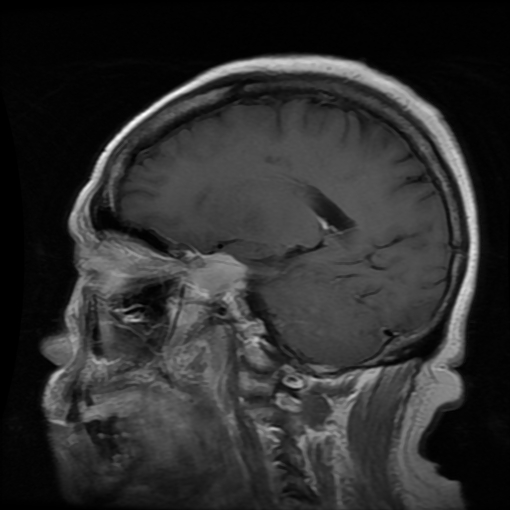

In [ ]:
crop_image(image)

In [ ]:
def geometric_transformation(image, random_seed=14):
    """
    Applies a series of geometric transformations to the input image to generate an augmented version.

    Args:
    image (numpy.ndarray): The input image to be transformed.
    random_seed (int): Seed for random transformations to ensure reproducibility. Default is 14.

    Returns:
    numpy.ndarray: The transformed image.
    """

    # Get the shape of the image.
    size = image.shape

    # Create an ImageDataGenerator with specified transformation parameters.
    datagen = ImageDataGenerator(
        rotation_range=90,          # Randomly rotate images in the range (0 to 90 degrees)
        width_shift_range=0.1,      # Randomly shift images horizontally (0 to 10% of the width)
        height_shift_range=0.1,     # Randomly shift images vertically (0 to 10% of the height)
        shear_range=0.4,            # Randomly shear the images
        zoom_range=0.3,             # Randomly zoom in/out on images
        vertical_flip= True,        # Randomly flip images vertically
        horizontal_flip=True,       # Randomly flip images horizontally
        fill_mode='constant',       # Fill mode for points outside the boundaries of the input
        cval=0                      # Value used for points outside the boundaries when fill_mode='constant'
    )

    # Reshape the image into a tensor to add a channel dimension.
    tensor = image.reshape(size[0], size[1], 1)

    # Apply a single random geometric transformation using the datagen to the image tensor.
    new_tensor = datagen.random_transform(tensor, seed=random_seed)

    # Remove the channel dimension to get back to the original shape.
    new_image = new_tensor[:, :, 0]

    # Return the transformed image.
    return new_image

# **Unbalanced Dataframe**

There is the necessity of augment our dataframe, because we have few data for deep learning models.  
We can apply differents approach

Data generation with simple transfomation:

- deterministic transformation:
   resizing,
   cropping,
   geometric transformation,
   filtering,
   theresholding   
                                    



- Generativa Models:
   Diffusion Model,
   GAN model,
   Variational Autoencoder







# **DATA ANALYSIS**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_pickle("/content/drive/MyDrive/ProgettoDataMining/complete_df.pkl")

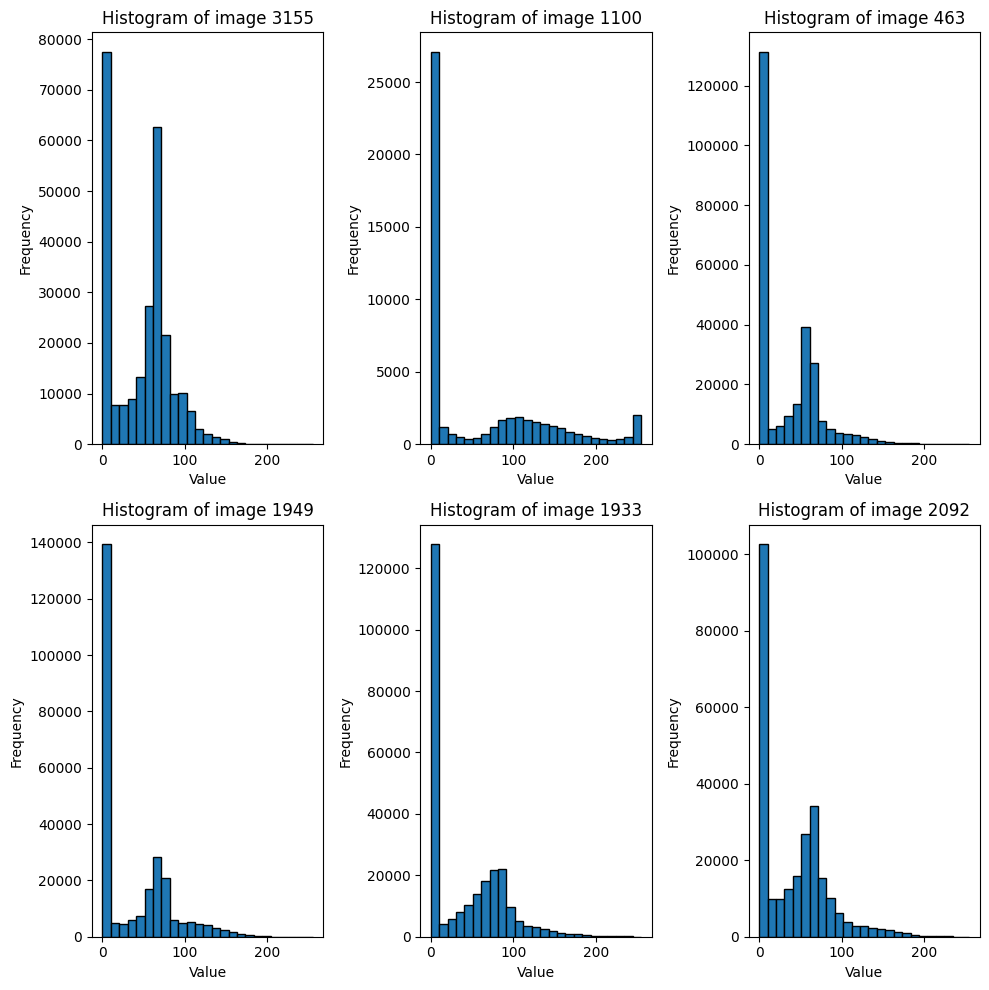

In [ ]:
# Define the number of examples to display.
n_example = 6
# Define the number of columns and rows in the subplot grid.
num_col = 3
num_row = n_example // num_col
# Create a figure with size 10x10 inches.
plt.figure(figsize=(10, 10))

# Iterate over each example in n_example.
for i in range(n_example):
    # Set the seed for reproducibility.
    random.seed(i)
    # Select a random index from the dataframe.
    index = random.randint(0, len(df) - 1)
    # Flatten the image at the selected index.
    image = df.at[index, "Image"].flatten()  # Usa 'index' anziché 'i'
    # Create a subplot in the correct position.
    plt.subplot(num_row, num_col, i + 1)  # Modifica l'indice del subplot
    # Plot histogram of pixel values with 25 bins.
    plt.hist(image, bins=25, edgecolor='black')
    # Set the label for x-axis, the lable for y-axis and the title of the subplot.
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.title(f'Histogram of image {index}')
# Adjust layout to prevent overlap.
plt.tight_layout()
# Display the figure.
plt.show()

# **CROPPING**

## Estimation of thereshold and application of filter

In [ ]:
## from data anlysis we have seen that is a value between 10 and 50
## we will take a random image

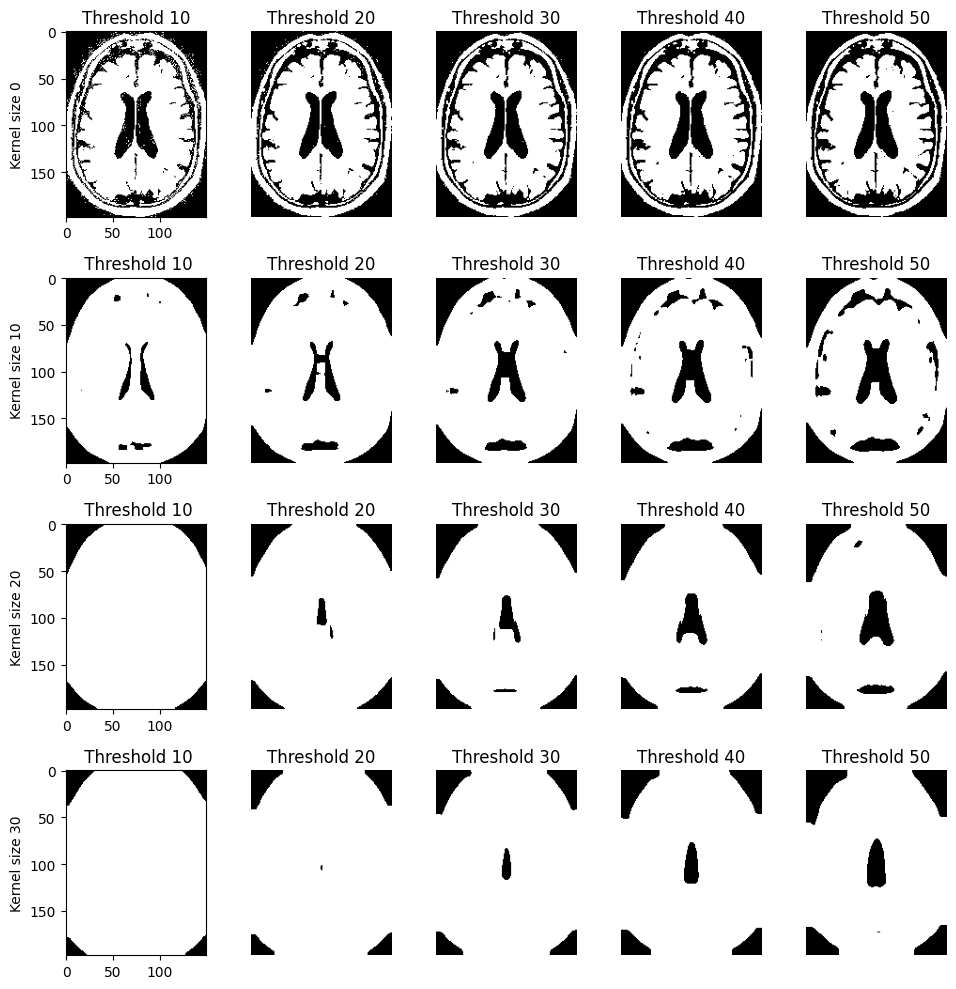

In [ ]:
# Select a random imagine from the dataframe, for example the image at index 100.
image = df.at[100,"Image"]
# Define a range of threshold values.
range_thresholds = [10, 20, 30, 40, 50]
# Define a range of blur kernel dimensions.
range_blur_kernel_dimension = [0, 10, 20, 30]
# Call the function to evaluate the thresholds.
evaluate_thresholds(image, range_thresholds, range_blur_kernel_dimension)

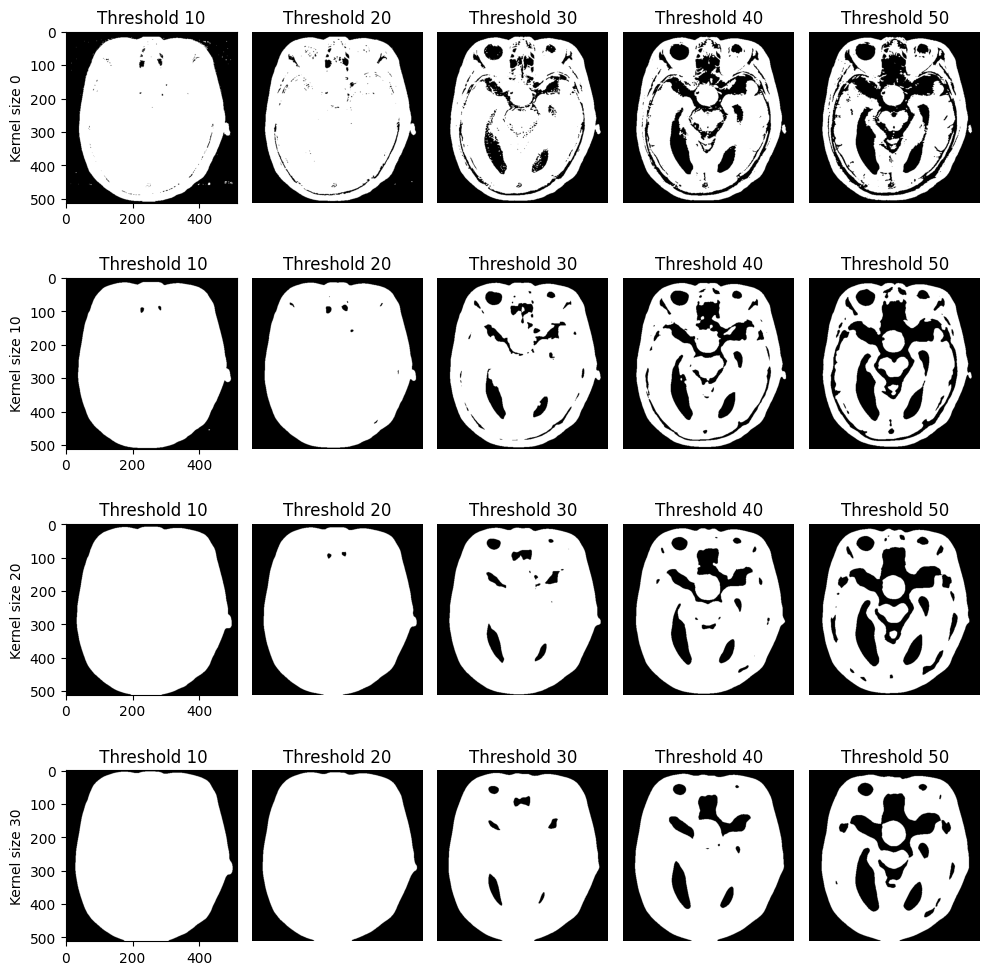

In [ ]:
# Select a random imagine from the dataframe, for example the image at index 5.
image = df.at[5,"Image"]
# Define a range of threshold values.
range_thresholds = [10, 20, 30, 40, 50]
# Define a range of blur kernel dimensions.
range_blur_kernel_dimension = [0, 10, 20, 30]
# Call the function to evaluate the thresholds.
evaluate_thresholds(image, range_thresholds, range_blur_kernel_dimension)

In [ ]:
#the best values are a htershold of 20 and a kernel size of 30*30

## Effects of the application of the filter

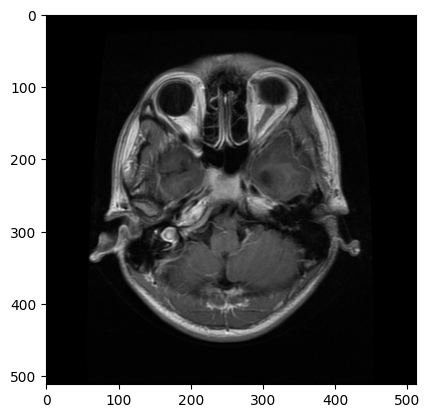

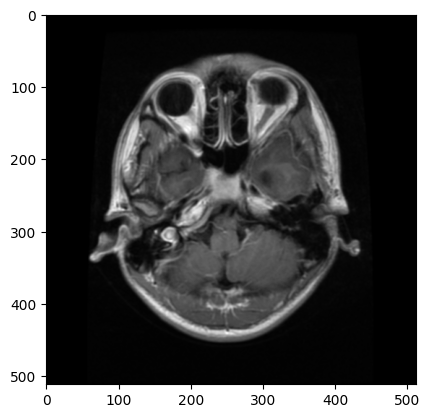

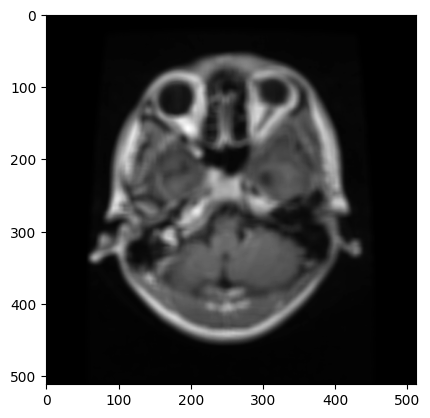

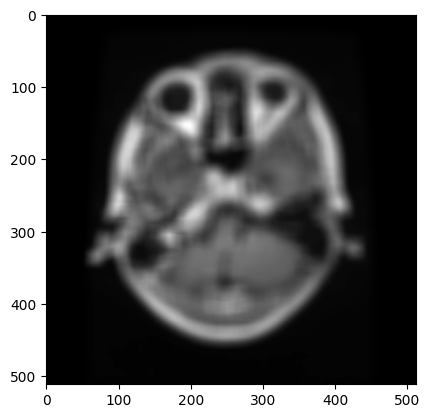

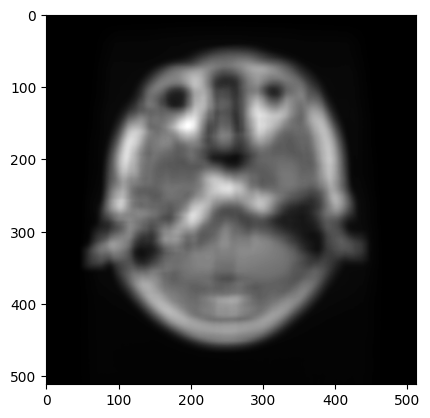

In [ ]:
# Define a list of kernel sizes for blurring.
ksizes =  [1, 3, 10, 20, 30]
# Iterate over each kernel size in the list.
for ksize  in  ksizes:
  # Copy the image at index 2 from the dataframe to avoid modifying the original image.
  image = df.at[2, "Image"].copy()
  # Apply a blur effect to the image using the current kernel size.
  image = cv2.blur(image, (ksize, ksize))
  # Display the blurred image using a grayscale color map.
  plt.imshow(image, cmap = "gray")
  plt.show()

## Applying the cropping to the images


In [ ]:
# Add a new column 'cropped_image' to the dataframe and initialize it with None.
df["cropped_image"] = None

# Loop through each row in the dataframe.
for i in range(len(df)):
    # Print the current index.
    print(i)
    # Retrieve the image at the current index.
    image = df.at[i, "Image"]
    # Apply the crop_image function to the retrieved image.
    cropped = crop_image(image)
    # Print the shape of the cropped image.
    print(cropped.shape)
    # Store the cropped image in the new 'cropped_image' column at the current index.
    df.at[i, "cropped_image"] = cropped

Output streaming troncato alle ultime 5000 righe.


(483, 511)
4109
X range 59 454
y range 22 503
Before (512, 512) After (395, 481) 






(395, 481)
4110
X range 57 455
y range 22 508
Before (512, 512) After (398, 486) 






(398, 486)
4111
X range 31 481
y range 0 511
Before (512, 512) After (450, 511) 






(450, 511)
4112
X range 9 505
y range 0 511
Before (512, 512) After (496, 511) 






(496, 511)
4113
X range 0 511
y range 0 511
Before (512, 512) After (511, 511) 






(511, 511)
4114
X range 74 437
y range 22 499
Before (512, 512) After (363, 477) 






(363, 477)
4115
X range 152 499
y range 0 360
Before (361, 642) After (209, 360) 






(209, 360)
4116
X range 58 455
y range 18 503
Before (512, 512) After (397, 485) 






(397, 485)
4117
X range 0 511
y range 0 511
Before (512, 512) After (511, 511) 






(511, 511)
4118
X range 0 511
y range 0 511
Before (512, 512) After (511, 511) 






(511, 511)
4119
X range 0 511
y range 0 511
Before (512, 512) After (511, 511

# **GEOMETRIC TRANSFORMATION**

## Effects of geometric transformations on a single image

In [ ]:
# Select the image from the dataframe at row 47 and column "cropped_image".
image = df.at[47, "cropped_image"]

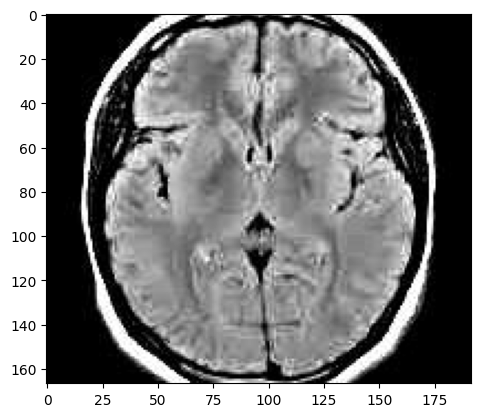

In [ ]:
# Display the selected image in grayscale.
plt.imshow(image, cmap="gray")
plt.show()

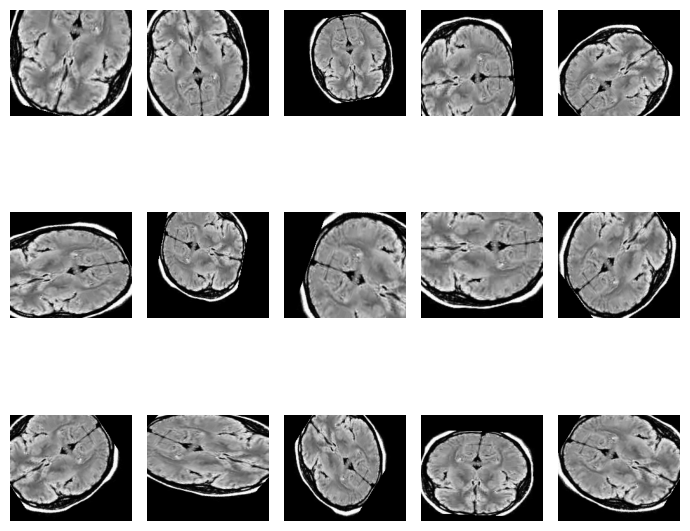

In [ ]:
# Set the number of rows and columns for the grid of transformed images.
num_row = 3
num_col = 5
num_example = num_row * num_col
# Set the figure size for the grid of images.
plt.figure(figsize=(7, 7))

# Iterate through rows and columns to create the grid of images.
for i in range(num_row):
    for j in range(num_col):
        # Calculate the index of the image in the grid.
        index = i * num_col + j + 1
        # Use the index as the seed for the transformation to ensure reproducibility.
        random_seed = index
        # Apply geometric transformation to the image using the specified seed.
        new_image = geometric_transformation(image, random_seed=random_seed)
        # Create a subplot in the grid at the specified position.
        plt.subplot(num_row, num_col, index)
        # Display the transformed image in grayscale.
        plt.imshow(new_image, cmap="gray")
        # Turn off axis for cleaner visualization.
        plt.axis('off')

# Optimize the layout of the grid.
plt.tight_layout()
# Display the figure.
plt.show()

## Appliying geometric transformation to each class

we can apply a the trasfmation at every class in order to balance the sample

In [ ]:
# Get the unique labels from the "Label" column in the dataframe.
df["Label"].unique()

array(['glioma', 'notumor', 'pituitary tumor', 'meningioma'], dtype=object)

In [ ]:
# Initialize an empty dictionary to store subsets of the dataframe.
dict = {}

# Loop through each unique label in the "Label" column of the DataFrame.
for label in df["Label"].unique():
    # Select the rows where the "Label" column matches the current label.
    subselected = df[df["Label"] == label]["cropped_image"]
    # Convert the selected series to a dataframe and reset the index.
    subselected_df = subselected.to_frame().reset_index(drop=True)
    # Store the resulting dataframe in the dictionary with the label as the key.
    dict[label] = subselected_df

glioma
                                          cropped_image
0     [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...
1     [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...
2     [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...
3     [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...
4     [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...
...                                                 ...
1421  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...
1422  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...
1423  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...
1424  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...
1425  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...

[1426 rows x 1 columns]
1426
notumor
                                          cropped_image
0     [[10, 10, 10, 10, 10, 10, 10, 10, 9, 9, 9, 9, ...
1     [[254, 2, 37, 39, 38, 31, 37, 39, 39, 39, 39, ...
2     [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...
3     [[30, 30, 30, 30, 30, 30, 30, 30, 29, 29, 29, ...
4  

In [ ]:
# Initialize an empty list to store the lengths of each subset DataFrame.
length = []
# Get the keys (unique labels) from the dictionary.
keys = dict.keys()

# Iterate through each key in the dictionary.
for  key in keys:
  # Get the length of the DataFrame corresponding to the current key.
  l = len(dict[key])
  # Print the key and the number of observations in its DataFrame.
  print("for the key", key, "the number of observations are:", l)
  # Append the length to the list.
  length.append(l)

# Print newline characters for spacing.
print("\n"*10)

# Find the maximum length among all subset DataFrames.
max_len = max(length)
# Initialize an empty dictionary to store the number of samples needed for each label.
dict_number_sample = {}

# Iterate through each key in the dictionary again.
for key in keys:
  # Get the length of the DataFrame corresponding to the current key.
  l = len(dict[key])
  # Calculate the number of observations needed to reach the maximum length.
  observation_to_sample = max_len -l
  # Store this number in the dictionary with the key as the label.
  dict_number_sample[key] = observation_to_sample

for the key glioma the nomber of obervations are : 1426
for the key notumor the nomber of obervations are : 1500
for the key pituitary tumor the nomber of obervations are : 930
for the key meningioma the nomber of obervations are : 708













In [ ]:
# Print the dictionary containing the number of samples needed for each label.
dict_number_sample

{'glioma': 74, 'notumor': 0, 'pituitary tumor': 570, 'meningioma': 792}

In [ ]:
# Initialize an empty dictionary to store the generated DataFrames.
generated = {}
# Iterate through each key in the dict_number_sample dictionary.
for key in dict_number_sample.keys():
  # Get the DataFrame corresponding to the current key.
  mini_df = dict[key]
  # Initialize an empty list to store the generated images.
  container = []
  # Generate the required number of samples for the current key.
  for i in range(dict_number_sample[key]):
    # Set the random seed for reproducibility.
     random.seed(i)
     # Randomly select an index within the range of the DataFrame length.
     index = random.randint(0,len(mini_df)-1)
     # Get the image at the selected index.
     image = mini_df.at[1,'cropped_image']
     # Apply geometric transformation to the image using the current seed.
     new_image = geometric_transformation(image, random_seed=i)
     # Append the transformed image to the container list.
     container.append([new_image])
  # Convert the container list to a DataFrame and store it in the generated dictionary.
  generated[key] = pd.DataFrame(container, columns=['cropped_image'])

## New DataFrame

In [ ]:
# Initialize an empty DataFrame to store the final combined DataFrame.
df_transformation = pd.DataFrame()

#  Iterate over the keys in the generated dictionary.
for key in generated.keys():
    # Get the old DataFrame from the original dictionary.
    df_old = dict[key]
    # Get the new DataFrame from the generated dictionary.
    df_new = generated[key]
    # Concatenate the old and new DataFrames and reset the index.
    df_class = pd.concat([df_old, df_new]).reset_index(drop=True).reset_index(drop=True)
    print(len(df_class))
    # Add a label column with the current key to the combined DataFrame.
    df_class["Label"] = key
    # Concatenate the df_class DataFrame to the final df_transformation DataFrame
    df_transformation = pd.concat([df_transformation, df_class]).reset_index(drop=True)

1500
1500
1500
1500


In [ ]:
# Shuffle the df_transformation DataFrame and reset the index.
df_transformation = df_transformation.sample(frac=1).reset_index(drop=True).reset_index(drop=True)

In [ ]:
# Display the count of each label in the df_transformation DataFrame.
df_transformation["Label"].value_counts()

Label
glioma             1500
pituitary tumor    1500
notumor            1500
meningioma         1500
Name: count, dtype: int64

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)
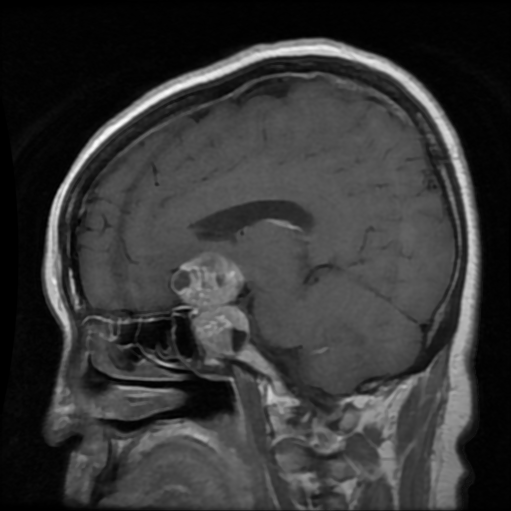

In [ ]:

df_transformation.at[4, "cropped_image"]